In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
data=datasets.load_iris()

In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
df=df.fillna(0)

In [24]:
x=df.iloc[:,[0,1,2,3]].values

In [25]:
from sklearn.cluster import KMeans

In [26]:
km=KMeans(n_clusters=3,max_iter=300,n_init=10,random_state=0)

In [27]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [28]:
cluster=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    cluster.append(km.inertia_)

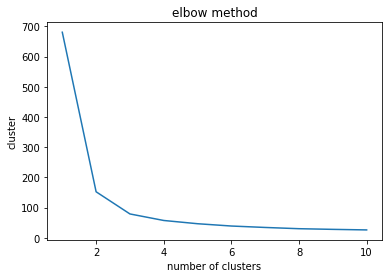

In [29]:
plt.plot(range(1,11),cluster)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('cluster')
plt.show()

In [30]:
km=KMeans(n_clusters=3,max_iter=300,n_init=10,random_state=0)
km.fit(x)
y_pred=km.predict(x)

In [31]:
pd.DataFrame(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


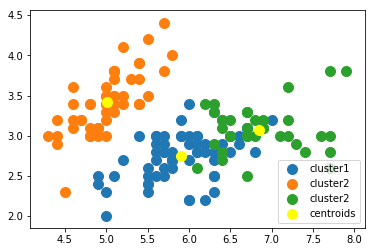

In [32]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],
            s=100,label='cluster1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],
           s=100,label='cluster2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],
           s=100,label='cluster2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1]
           ,s=100,c='yellow',label='centroids')

plt.legend()